## Table of Content

To build a simple feedforward neural network using Keras, we'll first go through the data science framework steps:

### 1 Simple feedforward neural networK
* Define the problem
* Gather the data
* Prepare the data
* Create the model
* Train the model
* Evaluate the model
* Deploy the model (optional)

### 2 Loss Functions Available in Keras

### 3 Optimization

### 4  Activation Functions


### 5 Assignment:

In this example, we'll use the "Students Performance in Exams" dataset from Kaggle to predict whether a student passes or fails based on their demographic information and test scores.

You can download the dataset from this link: https://www.kaggle.com/spscientist/students-performance-in-exams



## Define the problem:

Our goal is to create a feedforward neural network that can predict whether a student passes or fails based on their demographic information and test scores.

## Gather the data:

Download the dataset from the Kaggle link provided above.

## Prepare the data:

First, we'll load and preprocess the data using pandas and scikit-learn:

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Africa_Data_School/notebooks/data/StudentsPerformance.csv")

# Preprocess the data
data["average_score"] = (data["math score"] + data["reading score"] + data["writing score"]) / 3
data["pass"] = data["average_score"] >= 60
data["pass"] = data["pass"].astype(int)

# Encode categorical features
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(data[cat_cols]).toarray()

# Combine encoded features with numeric features
numeric_cols = ["math score", "reading score", "writing score", "average_score"]
X = pd.concat([pd.DataFrame(encoded_features), data[numeric_cols].reset_index(drop=True)], axis=1)
# converting all features to strings
X.columns = X.columns.astype(str)
y = data["pass"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X.columns = X.columns.astype(str)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1


## Create the model:
Now, we'll build a simple feedforward neural network using Keras:

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


## Train the model:
Train the neural network on the preprocessed data:

In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
20/20 [==============================] - 1s 25ms/step - loss: 0.5658 - accuracy: 0.7281 - val_loss: 0.4336 - val_accuracy: 0.8375
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.8578 - val_loss: 0.3169 - val_accuracy: 0.9000
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.9281 - val_loss: 0.2495 - val_accuracy: 0.9062
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1872 - accuracy: 0.9547 - val_loss: 0.1938 - val_accuracy: 0.9312
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1409 - accuracy: 0.9688 - val_loss: 0.1594 - val_accuracy: 0.9438
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1097 - accuracy: 0.9781 - val_loss: 0.1325 - val_accuracy: 0.9625
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0890 - accuracy: 0.9812 - val_loss: 0.1149 - val_accuracy: 0.9750
Epoch 8/100


## Evaluate the model:
Evaluate the model's performance on the test data

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")


7/7 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.9700
Test loss: 0.10947801917791367, Test accuracy: 0.9700000286102295


## Model optimization:

You can optimize the model by tuning hyperparameters like the number of layers, number of neurons, learning rate, batch size, and number of epochs. To find the optimal hyperparameters, you can use techniques like Grid Search or Random Search.

* To demonstrate model optimization using Grid Search, we'll use the GridSearchCV class from scikit-learn with the KerasClassifier wrapper from the Keras library. In this example, we'll optimize the number of neurons in the hidden layers, batch size, and number of epochs.

First, create a function that returns the Keras model with variable parameters:

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(neurons_1=32, neurons_2=16):
    model = Sequential()
    model.add(Dense(neurons_1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(neurons_2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


Now, wrap the function with KerasClassifier and set up the parameter grid for Grid Search:

In [1]:
pip install scikeras

     ---------------------------------------- 0.0/40.8 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.8 kB ? eta -:--:--
     ---------------------------- --------- 30.7/40.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 40.8/40.8 kB 492.1 kB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
Note: you may need to restart the kernel to use updated packages.


In [29]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=create_model)

param_grid = {
    'neurons_1': [32, 64, 128],
    'neurons_2': [16, 32, 64],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)


<ipython-input-29-32edc73a5de4>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Finally, fit the grid search to the training data:

In [31]:
%%time
grid_result = grid.fit(X_train, y_train)


Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 0.5850 - accuracy: 0.7175
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8750
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.9137
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.9262
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.9388
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9538
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9663
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1365 - accuracy: 0.9762
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9787
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9862
Epoch 11/50
13/13 [

In [32]:
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best score: 0.982503 using {'batch_size': 64, 'epochs': 50, 'neurons_1': 64, 'neurons_2': 16}


In [33]:
grid.best_params_

{'batch_size': 64, 'epochs': 50, 'neurons_1': 64, 'neurons_2': 16}

## Save the model:
Save the trained model for future use:

In [ ]:
model.save("/content/drive/MyDrive/Africa_Data_School/notebooks/data/student_pass_predictor.h5")


## Metric evaluation:

To further evaluate the model, you can analyze the training history to plot accuracy and loss over time:

[]

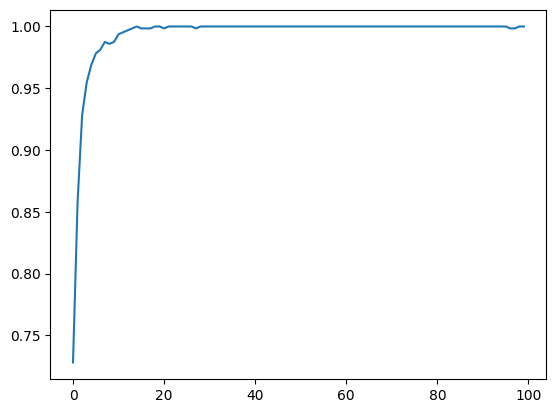

In [34]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot()


## Loss Functions Available in Keras

Keras provides a range of loss functions that can be used in various machine learning problems. The following are some of the commonly used loss functions available in Keras:

### Regression Loss Functions

- **Mean Squared Error (MSE):** This is the most common loss function for regression problems. It measures the average squared difference between the predicted values and the actual values.
- **Mean Absolute Error (MAE):** This is a loss function that is less sensitive to outliers than MSE. It measures the average absolute difference between the predicted values and the actual values.
- **Huber Loss:** This is a loss function that is less sensitive to outliers than MSE. It is often used for regression problems where there may be outliers in the data.
- **Logcosh Loss:** This is a loss function that is less sensitive to outliers than MSE. It is often used for regression problems where there may be outliers in the data.
- **Tweedie Loss:** This is a loss function that is often used for count data. It is more robust to overfitting than MSE.
- **Poisson Loss:** This is a loss function that is often used for count data. It is more robust to overfitting than MSE.

### Classification Loss Functions

- **Categorical Crossentropy (CCE):** This is the most common loss function for classification problems. It measures the difference between the predicted probabilities and the actual probabilities.
- **Sparse Categorical Crossentropy:** This is a loss function that is similar to CCE, but it is used for sparse classification problems.
- **Binary Crossentropy (BCE):** This is a loss function that is similar to CCE, but it is used for binary classification problems.
- **Weighted Categorical Crossentropy:** This is a loss function that is similar to CCE, but it allows you to weight the different classes differently. This can be useful if some classes are more important than others.
- **KL Divergence:** This is a loss function that measures the difference between two probability distributions. It is often used for natural language processing tasks.

### Other Loss Functions

- **Hinge Loss:** This is a loss function that is often used for binary classification problems. It measures the distance between the predicted value and the decision boundary.
- **Triplet Loss:** This is a loss function that is often used for face recognition tasks. It measures the distance between a pair of images, where one image is the anchor image and the other image is either a positive or negative example.
- **Custom Loss Function:** You can also create your own custom loss function. To do this, you need to create a function that takes the predicted values and the actual values as input and returns a single number as the loss.

The choice of loss function depends on the type of problem that you are trying to solve. For example, if you are trying to predict a continuous value, then you would use a regression loss function such as MSE. If you are trying to classify an observation into one of a set of discrete categories, then you would use a classification loss function such as CCE.


## Optimization

### Gradient Descent

Gradient Descent is a first-order optimization algorithm that finds the local minimum of the loss function by iteratively updating the weights in the direction of the negative gradient. It uses the same learning rate for all parameters and can be slow to converge.

**Usage:** Linear regression, logistic regression, shallow networks

**Variants:** Batch Gradient Descent, Stochastic Gradient Descent (SGD), Mini-Batch Gradient Descent

### Momentum

Momentum is a modification of gradient descent that incorporates a momentum term to speed up convergence. It helps the optimizer navigate through local minima and plateaus more effectively by adding a fraction of the previous update to the current update.

**Usage:** Deep networks, CNNs, Recurrent Neural Networks (RNNs)

**Formula:** v_t = γv_(t-1) + η∇L(w_(t-1)) and w_t = w_(t-1) - v_t, where v is the momentum term, γ is the momentum coefficient, η is the learning rate, and ∇L is the gradient of the loss function

### Nesterov Accelerated Gradient (NAG)

NAG is a modification of momentum that incorporates the Nesterov momentum term. It improves upon the momentum method by using the lookahead gradient, which can result in better convergence.

**Usage:** Deep networks, CNNs, RNNs

**Formula:** v_t = γv_(t-1) + η∇L(w_(t-1) - γv_(t-1)) and w_t = w_(t-1) - v_t

### Adagrad

Adagrad is an adaptive learning rate optimizer that adjusts the learning rate for each parameter based on the past gradients. It is well-suited for sparse data and can converge more quickly than gradient descent.

**Usage:** Deep networks, natural language processing tasks, recommendation systems

**Formula:** G_t = G_(t-1) + (∇L(w_(t-1)))^2 and w_t = w_(t-1) - η * ∇L(w_(t-1)) / √(G_t + ε), where G is the sum of the squared gradients, and ε is a small constant to avoid division by zero

### RMSprop

RMSprop is an adaptive learning rate optimizer that improves upon Adagrad by using an exponentially decaying average of the squared gradients. This helps prevent the learning rate from becoming too small, which can happen with Adagrad.

**Usage:** Deep networks, CNNs, RNNs

**Formula:** G_t = βG_(t-1) + (1-β)(∇L(w_(t-1)))^2 and w_t = w_(t-1) - η * ∇L(w_(t-1)) / √(G_t + ε), where β is the decay rate

### Adam (Adaptive Moment Estimation)

Adam is an adaptive learning rate optimizer that combines elements of both momentum and RMSprop. It maintains separate learning rates for each parameter and adapts them based on the first and second moments of the gradients.

**Usage:** Deep networks, CNNs, RNNs


## Activation Functions

Activation functions introduce non-linearity into a neural network, allowing it to learn complex patterns and make predictions based on the input data. They are applied to the output of each neuron in the network. Here are some common activation functions and their typical use cases:

### Sigmoid

The sigmoid function maps input values to the range (0, 1), making it suitable for binary classification tasks or any task requiring an output in the probability range.

**Usage:** Output layer in binary classification, hidden layers in shallow networks

**Formula:** sigmoid(x) = 1 / (1 + exp(-x))

### Tanh (Hyperbolic Tangent)

The tanh function maps input values to the range (-1, 1). It is similar to the sigmoid function but has a wider output range, making it more suitable for hidden layers in some networks.

**Usage:** Hidden layers in shallow networks

**Formula:** tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))

### ReLU (Rectified Linear Unit)

ReLU is a piecewise linear function that outputs the input value if it's positive and 0 otherwise. It is computationally efficient and helps mitigate the vanishing gradient problem in deep networks.

**Usage:** Hidden layers in deep networks, convolutional neural networks (CNNs)

**Formula:** ReLU(x) = max(0, x)

### Leaky ReLU

Leaky ReLU is a variation of the ReLU function that allows a small, non-zero gradient for negative input values. This can help reduce the "dying ReLU" problem, where neurons become inactive and don't contribute to the learning process.

**Usage:** Hidden layers in deep networks, CNNs

**Formula:** LeakyReLU(x) = max(αx, x), where α is a small constant (e.g., 0.01)

### ELU (Exponential Linear Unit)

ELU is another variation of the ReLU function that smooths the curve for negative input values, allowing for non-zero gradients. This can help with the vanishing gradient problem.

**Usage:** Hidden layers in deep networks, CNNs

**Formula:** ELU(x) = x if x > 0, else α(exp(x) - 1), where α is a constant (e.g., 1)

### Softmax

The softmax function is used in multi-class classification tasks. It maps input values to a probability distribution over multiple classes, ensuring that the sum of probabilities for all classes equals 1.

**Usage:** Output layer in multi-class classification

**Formula:** softmax(x)_i = exp(x_i) / Σ(exp(x_j)) for all j

Choosing the right activation function depends on the problem you're trying to solve, the architecture of your neural network, and the input data's nature. Different activation functions have different properties, and using the appropriate activation function can improve the model's performance and training efficiency.


# Assignment:

Predicting House Prices Using a Feedforward Neural Network

### Objective:
Create a feedforward neural network to predict house prices based on various features such as the number of rooms, location, size, and other factors.

### Dataset:
Use the "House Prices: Advanced Regression Techniques" dataset available on Kaggle. You can download the dataset from this link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### Tasks:

* Define the problem: Determine the goal of the project and the problem you're trying to solve using the feedforward neural network.

* Gather the data: Download the dataset from the Kaggle link provided above.

* Prepare the data: Clean and preprocess the data. Handle missing values, encode categorical variables, and normalize or standardize numerical variables.

* Create the model: Build a feedforward neural network using Keras with an appropriate architecture for predicting house prices. You can experiment with different numbers of layers, neurons, and activation functions.

* Train the model: Train the neural network on the preprocessed data. Experiment with different batch sizes and numbers of epochs to improve the model's performance.

* Evaluate the model: Test the model's performance on a separate validation or test set. Calculate metrics such as mean squared error, mean absolute error, and R-squared to assess the model's accuracy.

* Optimize the model: Perform hyperparameter tuning to find the optimal architecture and parameters for the neural network. You can use techniques like Grid Search or Random Search.

Present your findings: Create a report or presentation summarizing your methodology, model architecture, performance metrics, and any insights or recommendations based on your findings.

This assignment will help you gain a deeper understanding of feedforward neural networks and their applications in regression tasks. Additionally, you'll gain experience in data preprocessing, model evaluation, and hyperparameter tuning.

# SOLUTION

In [ ]:
# Load the dataset
train_data = pd.read_csv("data/house/train.csv")
test_data = pd.read_csv("data/house/test.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
train_data = pd.read_csv("data/house/train.csv")
test_data = pd.read_csv("data/house/test.csv")

# Preprocess the data
train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

# Convert categorical features to strings
cat_cols = train_data.select_dtypes(include=['object']).columns
train_data[cat_cols] = train_data[cat_cols].astype(str)
test_data[cat_cols] = test_data[cat_cols].astype(str)

# Encode categorical features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features_train = one_hot_encoder.fit_transform(train_data[cat_cols]).toarray()
encoded_features_test = one_hot_encoder.transform(test_data[cat_cols]).toarray()

# Combine encoded features with numeric features
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).drop(['Id', 'SalePrice'], axis=1).columns
X_train = pd.concat([pd.DataFrame(encoded_features_train), train_data[numeric_cols].reset_index(drop=True)], axis=1)
X_test = pd.concat([pd.DataFrame(encoded_features_test), test_data[numeric_cols].reset_index(drop=True)], axis=1)
y_train = train_data['SalePrice']

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict on test data
y_pred = model.predict(X_test)

# Optional: evaluate the model using a separate validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=100, batch_size=32)
y_val_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error: {mse}, Mean Absolute Error: {mae}, R-squared: {r2}")


Epoch 1/100


C:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\John\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


46/46 [==============================] - 0s 2ms/step - loss: 39030476800.0000
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 38830428160.0000
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 37231734784.0000
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 31161845760.0000
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 19147220992.0000
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 8795296768.0000
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 5417553920.0000
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 3793114880.0000
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 2825304320.0000
Epoch 10/100
46/46 [==============================] - 0s 2ms/step - loss: 2314813696.0000
Epoch 11/100
46/46 [==============================] - 0s 2ms/step - loss: 2027522944.0000
Epoch 12/100
46/46 [======

Epoch 93/100
46/46 [==============================] - 0s 3ms/step - loss: 255753520.0000
Epoch 94/100
46/46 [==============================] - 0s 3ms/step - loss: 251221120.0000
Epoch 95/100
46/46 [==============================] - 0s 3ms/step - loss: 247949392.0000
Epoch 96/100
46/46 [==============================] - 0s 3ms/step - loss: 243718416.0000
Epoch 97/100
46/46 [==============================] - 0s 3ms/step - loss: 242654048.0000
Epoch 98/100
46/46 [==============================] - 0s 3ms/step - loss: 240876944.0000
Epoch 99/100
46/46 [==============================] - 0s 3ms/step - loss: 238526704.0000
Epoch 100/100
46/46 [==============================] - 0s 2ms/step
Epoch 1/100
37/37 [==============================] - 0s 3ms/step - loss: 218241680.0000
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 213170112.0000
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 208837840.0000
Epoch 4/100
37/37 [===========================

* Mean Squared Error (MSE): MSE is a measure of the average squared difference between the predicted values and the actual values. In this case, the MSE is 504796752.64394903, which means that the average squared difference between the predicted values and the actual values is 504796752.64394903.
* Mean Absolute Error (MAE): MAE is a measure of the average absolute difference between the predicted values and the actual values. In this case, the MAE is 14977.515410958904, which means that the average absolute difference between the predicted values and the actual values is 14977.515410958904.
* R-squared : R-squared is a measure of how well the model fits the data. It is a number between 0 and 1, where 0 means that the model does not fit the data at all and 1 means that the model fits the data perfectly. In this case, the R-squared is 0.9341883592680905, which means that the model fits the data very well.

    In general, a lower MSE and MAE indicate better model accuracy. A higher R-squared indicates a better fit between the model's predictions and the actual observations.